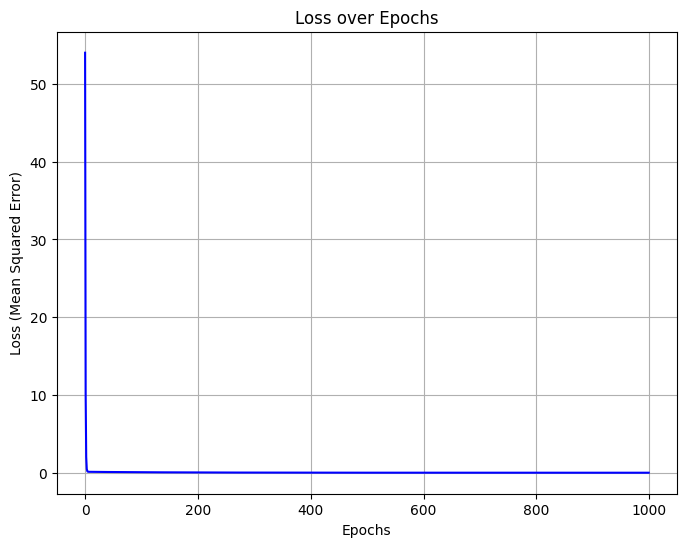

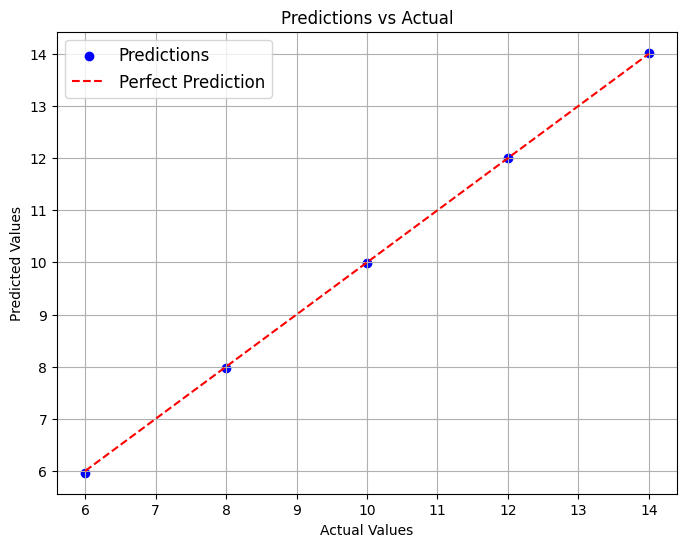

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of iterations for gradient descent
        self.weights = None  # To store the weights of the model
        self.bias = 0  # To store the bias term

    def fit(self, X, y):
        """
        Train the model using gradient descent to minimize the loss (Mean Squared Error)
        """
        m = len(X)  # Number of data points
        n = X.shape[1]  # Number of features

        # Initialize weights and bias
        self.weights = np.zeros(n)

        # Store the loss values for plotting
        self.losses = []

        # Gradient descent
        for _ in range(self.epochs):
            # Make predictions
            predictions = self.predict(X)

            # Calculate the error
            error = predictions - y

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, error)  # Gradient for weights
            db = (1 / m) * np.sum(error)  # Gradient for bias

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the loss for visualization
            loss = (1 / (2 * m)) * np.sum(error ** 2)
            self.losses.append(loss)

    def predict(self, X):
        """
        Predict the target values using the learned model (y = Xw + b)
        """
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """
        Calculate the R-squared (coefficient of determination) score of the model
        """
        predictions = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
        ss_residual = np.sum((y - predictions) ** 2)  # Residual sum of squares
        return 1 - (ss_residual / ss_total)  # R-squared formula

    def plot_loss(self):
        """
        Plot the loss over the training epochs to visualize convergence
        """
        plt.figure(figsize=(8, 6))
        plt.plot(range(self.epochs), self.losses, color='blue')
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (Mean Squared Error)')
        plt.grid(True)
        plt.show()

    def plot_predictions(self, X, y):
        """
        Plot the predictions vs actual values for the model performance
        """
        predictions = self.predict(X)

        plt.figure(figsize=(8, 6))
        plt.scatter(y, predictions, color='blue', label='Predictions')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
        plt.title('Predictions vs Actual')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_3d_surface(self, X, y):
        """
        Plot a 3D surface plot if there are exactly 2 features in X.
        """
        if X.shape[1] == 2:
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Create a grid of values
            x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
            x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
            x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
            X_grid = np.c_[x0_grid.ravel(), x1_grid.ravel()]
            y_grid = self.predict(X_grid).reshape(x0_grid.shape)

            ax.plot_surface(x0_grid, x1_grid, y_grid, cmap='viridis', alpha=0.7)
            ax.scatter(X[:, 0], X[:, 1], y, color='red', label='Data points')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_zlabel('Target Variable')
            ax.set_title('3D Surface Plot of Multiple Linear Regression')
            ax.legend()
            plt.show()


# Example usage:
if __name__ == "__main__":
    # Example dataset with 3 features (X) and 1 target variable (y)
    X = np.array([[1, 2, 3],
                  [2, 3, 4],
                  [3, 4, 5],
                  [4, 5, 6],
                  [5, 6, 7]])

    y = np.array([6, 8, 10, 12, 14])  # Target variable

    # Initialize and train the model
    model = MultipleLinearRegression(learning_rate=0.01, epochs=1000)
    model.fit(X, y)

    # Plot Loss over Epochs
    model.plot_loss()

    # Plot Predictions vs Actual values
    model.plot_predictions(X, y)

    # Plot 3D surface (only applicable for 2 features)
    model.plot_3d_surface(X, y)
